# Sales data 
Orders - July, 2021
## columns details
	
Fields	Definitions**
OrderedAt Date: 	The Order Date,
Customer Name:	Name Of The Retail Outlet,
outletType:	Classification of the Retail Outlet,
Producer:	The Line Item Producer,
Product:	The Line Item Product,
Category Group:	The Broad Category of the Line Item,
Quantity:	The Quantity Of The Line Item (SKU),
Unit Price:	The Unit Price Of The Line Item (SKU),
shippingStatus: 	The Fulfilment Status Of The Line Item (SKU),
Delivery Agent: 	The Delivery Agent The Order Was Assigned To,
State: 	The State where the retailer's store is Located,
Country:	The Country Where The retailers store is Located,
Currency:	The Currency The Order Is Denominated In,
saleschannel: 	The Channel The Order Was Raised Through,


### import libraries 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.simplefilter('ignore')

from sklearn import linear_model



### Acessing the csv file

In [34]:
df= pd.read_csv("Downloads/DATA_TASK.csv", encoding= 'unicode_escape')

In [35]:
df.head()

,OrderAt Date,customer Name,outletType,Producer,Product,Category Group,Quantity,Unit Price,shippingStatus,Delivery Agent,state,country,currency,salesChannel,sales price,sales price usd,order category,Unnamed: 17,ng,Unnamed: 19
0,7/1/2021 1:30,Mummy Marvelous Store,Supermarket,Chi Nigeria Limited,Hollandia Evap. Milk,Breakfast & Snacks,2.0,"3,200",delivered,Kayode Oluwashina,Lagos,NG,NGN,Telesales,"6,400",15.920398,low end,NaN,NGN,402.00
1,7/1/2021 1:30,Mummy Marvelous Store,Supermarket,Unilever Nigeria Plc,Lipton Special,Breakfast & Snacks,2.0,"3,500",cancelled,Edem Ebia,Lagos,NG,NGN,Telesales,"7,000",17.412935,low end,NaN,ZAR,14.72
2,7/1/2021 1:57,Facodon,Convenience Store,DUFIL Prima foods Plc,Indomie Indomitable Pack,Food,5.0,"2,400",delivered,Edem Ebia,Lagos,NG,NGN,Telesales,"12,000",29.850746,low end,NaN,NaN,NaN
3,7/1/2021 4:19,Mrs Omolara,Kiosk,Unilever Nigeria Plc,Lipton Special,Breakfast & Snacks,9.0,"3,500",delivered,Idris Habib Adewale,Lagos,NG,NGN,Telesales,"31,500",78.358209,low end,NaN,NaN,NaN
4,7/1/2021 6:26,Adeyemi Stores,Convenience Store,Unilever Nigeria Plc,Lipton Special,Breakfast & Snacks,10.0,"3,500",delivered,Deji Ibironke,Lagos,NG,NGN,Field Sales,"35,000",87.064677,low end,NaN,NaN,NaN


### Details Of the file

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8905 entries, 0 to 8904
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderAt Date     8904 non-null   object 
 1   customer Name    8904 non-null   object 
 2   outletType       8904 non-null   object 
 3   Producer         8904 non-null   object 
 4   Product          8904 non-null   object 
 5   Category Group   8904 non-null   object 
 6   Quantity         8904 non-null   float64
 7    Unit Price      8904 non-null   object 
 8   shippingStatus   8904 non-null   object 
 9   Delivery Agent   8904 non-null   object 
 10  state            8904 non-null   object 
 11  country          8904 non-null   object 
 12  currency         8904 non-null   object 
 13  salesChannel     8904 non-null   object 
 14  sales price      8904 non-null   object 
 15  sales price usd  8904 non-null   float64
 16  order category   8904 non-null   object 
 17  Unnamed: 17   

In [155]:
df.describe()

,Quantity,sales price usd
count,8904.000000,8904.000000
mean,4.145889,43.208275
std,16.037610,183.013304
min,0.250000,0.407439
25%,1.000000,4.485054
50%,1.000000,8.148777
75%,3.000000,24.129353
max,625.000000,4959.577114


### Checking for null values

In [65]:
df.isnull().sum()

OrderAt Date       1
customer Name      1
outletType         1
Producer           1
Product            1
Category Group     1
Quantity           1
 Unit Price        1
shippingStatus     1
Delivery Agent     1
state              1
country            1
currency           1
salesChannel       1
sales price        1
sales price usd    1
order category     1
dtype: int64

### Dropping of columns that are not needed

In [41]:
df.drop(["Unnamed: 17","ng","Unnamed: 19"], inplace=True, axis=1)

In [42]:
df.dropna(how='all')

,OrderAt Date,customer Name,outletType,Producer,Product,Category Group,Quantity,Unit Price,shippingStatus,Delivery Agent,state,country,currency,salesChannel,sales price,sales price usd,order category
0,7/1/2021 1:30,Mummy Marvelous Store,Supermarket,Chi Nigeria Limited,Hollandia Evap. Milk,Breakfast & Snacks,2.0,"3,200",delivered,Kayode Oluwashina,Lagos,NG,NGN,Telesales,"6,400",15.920398,low end
1,7/1/2021 1:30,Mummy Marvelous Store,Supermarket,Unilever Nigeria Plc,Lipton Special,Breakfast & Snacks,2.0,"3,500",cancelled,Edem Ebia,Lagos,NG,NGN,Telesales,"7,000",17.412935,low end
2,7/1/2021 1:57,Facodon,Convenience Store,DUFIL Prima foods Plc,Indomie Indomitable Pack,Food,5.0,"2,400",delivered,Edem Ebia,Lagos,NG,NGN,Telesales,"12,000",29.850746,low end
3,7/1/2021 4:19,Mrs Omolara,Kiosk,Unilever Nigeria Plc,Lipton Special,Breakfast & Snacks,9.0,"3,500",delivered,Idris Habib Adewale,Lagos,NG,NGN,Telesales,"31,500",78.358209,low end
4,7/1/2021 6:26,Adeyemi Stores,Convenience Store,Unilever Nigeria Plc,Lipton Special,Breakfast & Snacks,10.0,"3,500",delivered,Deji Ibironke,Lagos,NG,NGN,Field Sales,"35,000",87.064677,low end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,7/31/2021 19:41,Mummy David Stores,Supermarket,Flour Mills of Nigeria,Golden Penny Spaghetti,Food,1.0,"5,050",delivered,Samuel Shola,Lagos,NG,NGN,Mobile App,"5,050",12.562189,low end
8900,7/31/2021 19:41,Mummy David Stores,Supermarket,Unilever Nigeria Plc,Sunlight Washing Powder,Home Care,1.0,"2,420",delivered,Samuel Shola,Lagos,NG,NGN,Mobile App,"2,420",6.019900,low end
8901,7/31/2021 20:11,Mk,Supermarket,DUFIL Prima foods Plc,Power Pasta,Food,2.0,"4,600",delivered,Agbanije Babatunde Gabriel,Ogun,NG,NGN,Mobile App,"9,200",22.885572,low end
8902,7/31/2021 20:40,House 1,Kiosk,Arla Foods,DANO Full Cream,Breakfast & Snacks,1.0,"36,400",delivered,Nwokocha Omotope Olaore Regina,Lagos,NG,NGN,Mobile App,"36,400",90.547264,low end


In [43]:
#check for duplicated columns
df.duplicated().sum()

399

# Projects
1. Percentage of sales come from each outlet type
2. Average order quantity by category group
3. Most popular states by sales channel
4. make a chart showing the shipping status by outlet type
5. 10 VIP Customers
6. 10 least loyal customers
7. Producers account for the 5 lowest sales figure
8. 10 worst performing delivery agents
9. percentage of sales volume by sales channel and country.

### Percentage of sales come from each outlet type

In [91]:
print(df['outletType'].value_counts().sort_values(ascending=False))
print ('The percentage:')
print (round((df['outletType'].value_counts().sort_values(ascending=False)/ df['outletType'].count())*100.0, 0))

Convenience Store    3063
Kiosk                2930
Supermarket          2911
Name: outletType, dtype: int64
The percentage:
Convenience Store    34.0
Kiosk                33.0
Supermarket          33.0
Name: outletType, dtype: float64


In [92]:
def myplotcount(df, xvar,color=0,order=None,hue=None,hue_order=None,palette= None):
    #set fig size
    plt.figure(figsize=[10,7])
    #plotting
    sns.countplot(data=df,x=xvar, hue=hue,color=sns.color_palette()[color],palette=palette,order= order,edgecolor='black',hue_order=hue_order,linewidth=2);

Text(0, 0.5, 'Frequency')

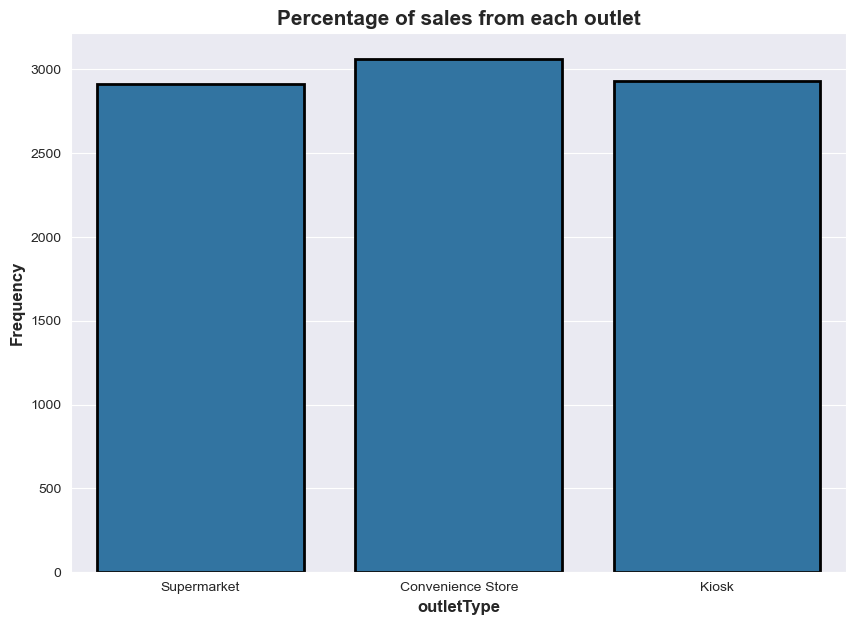

In [93]:
myplotcount(df,'outletType')
plt.title('Percentage of sales from each outlet', fontsize=15, weight='bold')
plt.xlabel('outletType', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')

### Average order quantity by category group

(array([0, 1, 2]),
 [Text(0, 0, 'low end'), Text(1, 0, 'mid end'), Text(2, 0, 'high end')])

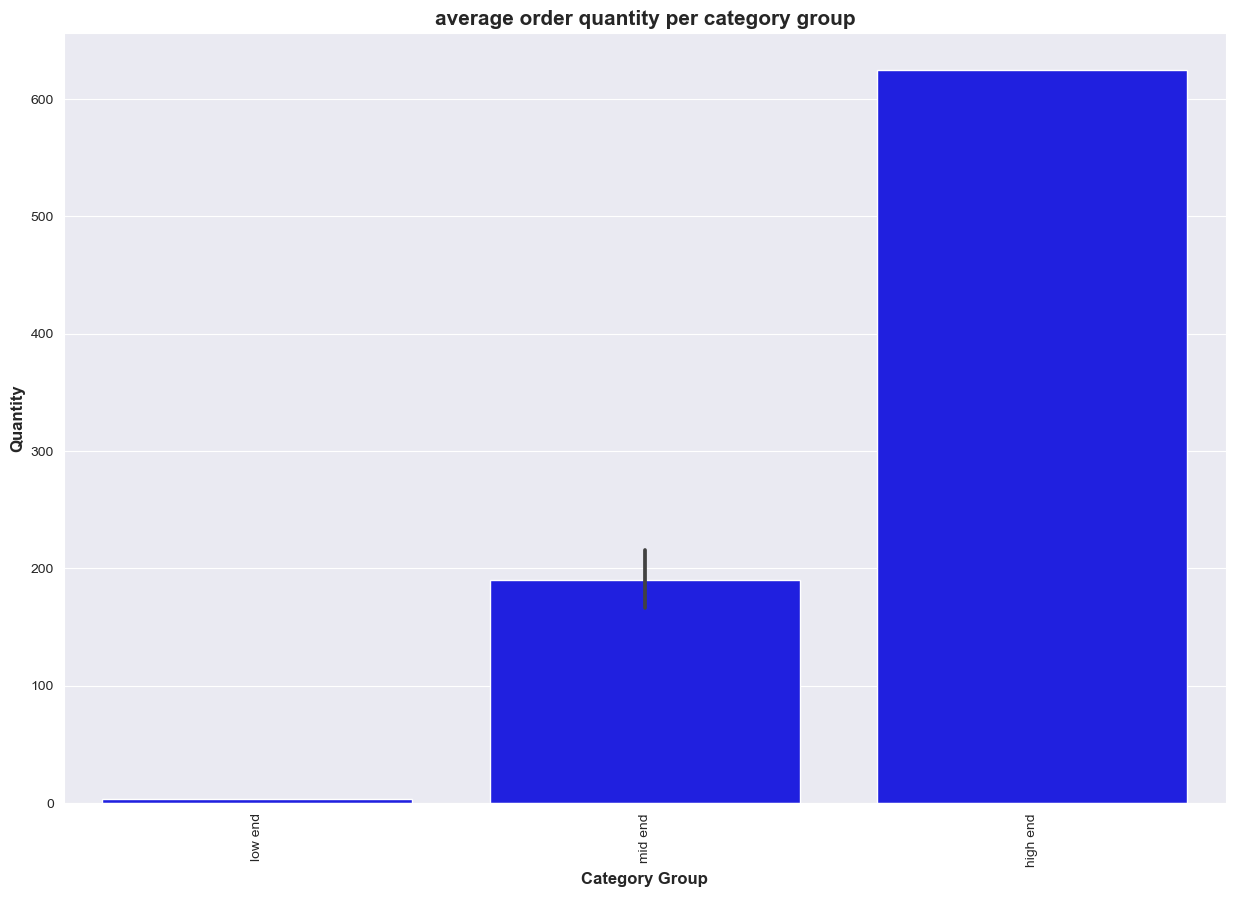

In [115]:
plt.figure(figsize=(15,10))
sns.barplot(x='order category',y='Quantity', data=df,color='blue')
plt.title('average order quantity per category group', fontsize=15, weight='bold')
plt.ylabel('Quantity', fontsize=12, weight='bold')
plt.xlabel('Category Group', fontsize=12, weight='bold')
plt.xticks(rotation=90)

### Most popular states by sales channel

In [104]:
popular_state= df.groupby('salesChannel')['state'].value_counts().sort_values(ascending=False).head(10)
popular_state

salesChannel  state  
Mobile App    Gauteng    3578
Telesales     Lagos      2154
Field Sales   Lagos      1224
Telesales     Gauteng     969
Mobile App    Lagos       438
Telesales     Ogun        238
Field Sales   Ogun        140
              FCT          63
Mobile App    Ogun         47
Telesales     LAGOS        16
Name: state, dtype: int64

<AxesSubplot:title={'center':'Top 10 VIP CUSTOMERS'}, xlabel='customer names', ylabel='sum of sales price'>

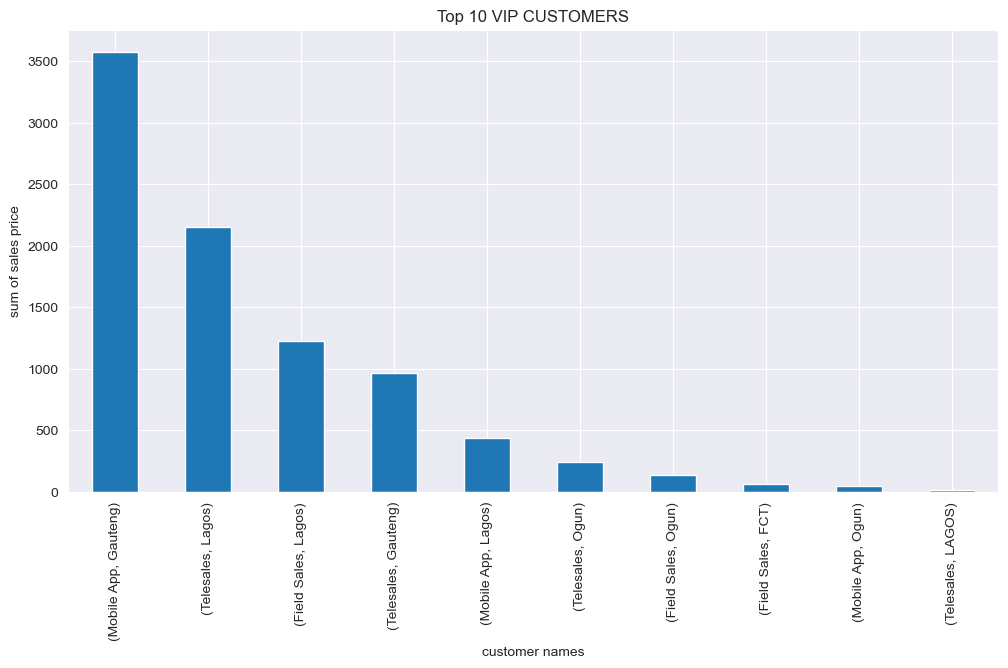

In [143]:
popular_state.plot(kind='bar', figsize =(12,6),xlabel='customer names',ylabel='sum of sales price', title=
                  'Top 10 VIP CUSTOMERS')

### make a chart showing the shipping status by outlet type

In [106]:
shipping= df.groupby('shippingStatus')['outletType'].value_counts().sort_values(ascending=False).head(10)
shipping

shippingStatus  outletType       
delivered       Convenience Store    2761
                Kiosk                2626
                Supermarket          2570
cancelled       Supermarket           341
                Kiosk                 304
                Convenience Store     302
Name: outletType, dtype: int64

([<matplotlib.patches.Wedge at 0x7f80f488c5b0>,
 [Text(-0.6180477294745469, -0.9099543967097238, "('delivered', 'Convenience Store')"),
  Text(1.0610991457334136, -0.28994586205672973, "('delivered', 'Kiosk')"),
  Text(0.004657271225459844, 1.0999901407852402, "('delivered', 'Supermarket')"),
  Text(-0.9389571505762109, 0.5730265869763838, "('cancelled', 'Supermarket')"),
  Text(-1.0440312162591336, 0.34640845757064664, "('cancelled', 'Kiosk')"),
  Text(-1.0937612967414005, 0.11698814363246417, "('cancelled', 'Convenience Store')")],
 [Text(-0.3371169433497528, -0.4963387618416675, '31.0%'),
  Text(0.5787813522182255, -0.15815228839457982, '29.5%'),
  Text(0.0025403297593417323, 0.5999946222464946, '28.9%'),
  Text(-0.5121584457688422, 0.31255995653257296, '3.8%'),
  Text(-0.5694715725049819, 0.18895006776580722, '3.4%'),
  Text(-0.5965970709498548, 0.06381171470861681, '3.4%')])

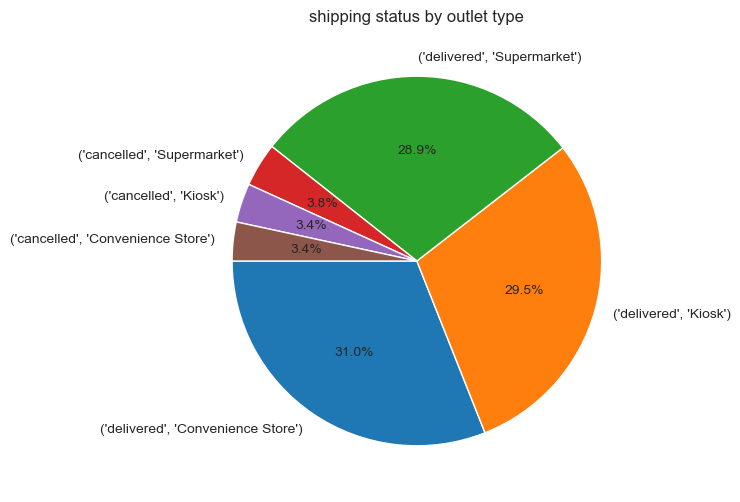

In [114]:
plt.figure(figsize=(12,6))
plt.title('shipping status by outlet type')
plt.pie(shipping,labels=shipping.index, autopct='%1.1f%%', startangle=180, shadow=False)

### 10 VIP Customers

In [136]:
vip_customer= df.groupby('customer Name')['sales price usd'].sum().sort_values(ascending=False).head(10)

vip_customer

customer Name
Iya Ruka K Store                                   7657.164178
Ben Green Venture Store                            6886.218905
Royal Born Store Lagos State                       6843.470149
Gidan Sama Supermarket                             5684.079602
Nonye Store                                        5184.601989
Ym Stores                                          4968.905473
Green Leaves General Enterprise                    4959.577114
Ail. Yusuf Lawan Usman, Provision And Cosmetics    4959.577114
Benijraat  Store                                   4610.820895
Oreofe Stores                                      4424.129353
Name: sales price usd, dtype: float64

<AxesSubplot:title={'center':'Top 10 VIP CUSTOMERS'}, xlabel='customer names', ylabel='sum of sales price'>

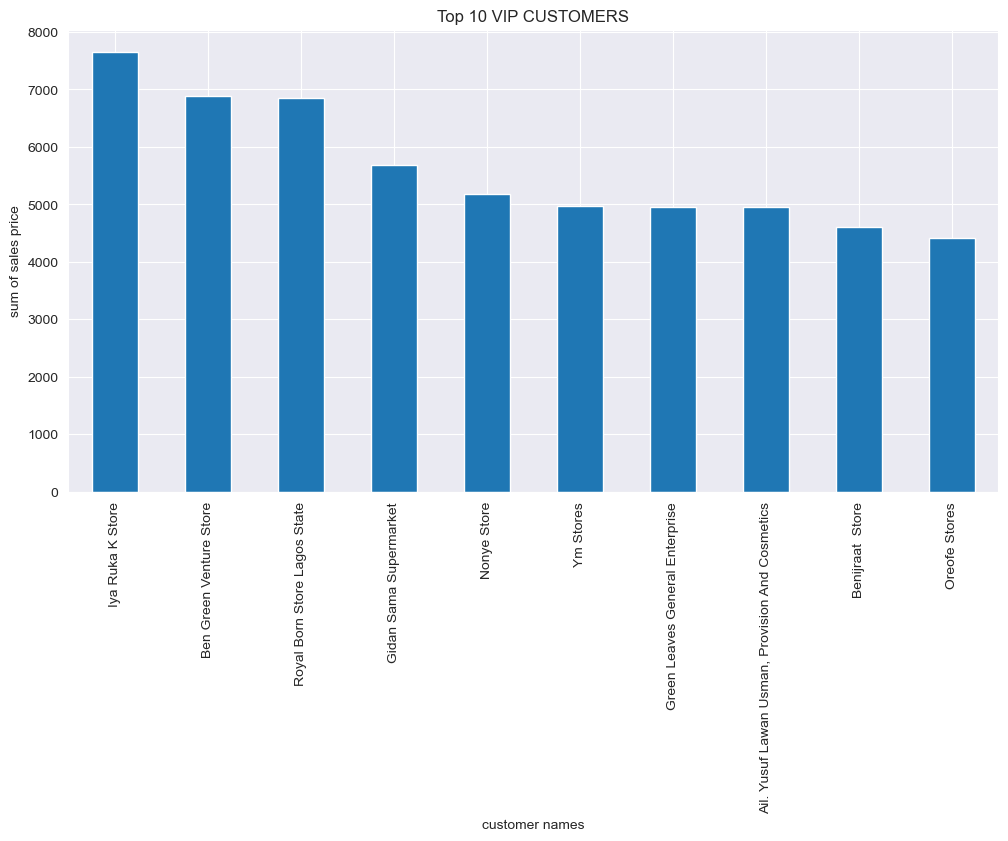

In [140]:
vip_customer.plot(kind='bar', figsize =(12,6),xlabel='customer names',ylabel='sum of sales price', title=
                  'Top 10 VIP CUSTOMERS')

### 10 least loyal customers

In [141]:
least_customer= df.groupby('customer Name')['sales price usd'].sum().sort_values(ascending=True).head(10)

least_customer

customer Name
Face To Face               0.407439
Busy Corner Supermarket    2.593750
Takas Grocery              2.656250
Tomitope Stores            2.736318
Tina Store                 2.736318
Mummy Tboy Store           2.736318
Tina Shop                  2.736318
Sb                         3.824728
Cost Price                 3.871603
Godoleos Tuckshop          3.889266
Name: sales price usd, dtype: float64

<AxesSubplot:title={'center':'Top 10 VIP CUSTOMERS'}, xlabel='customer names', ylabel='sum of sales price'>

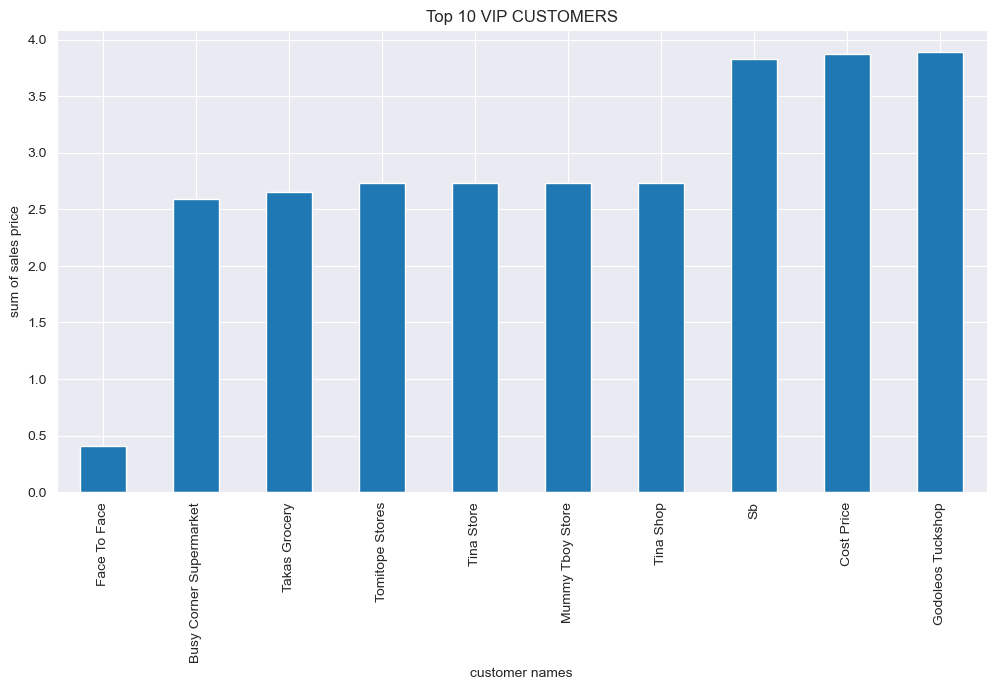

In [142]:
least_customer.plot(kind='bar', figsize =(12,6),xlabel='customer names',ylabel='sum of sales price', title=
                  'Top 10 VIP CUSTOMERS')

### Producers account for the 5 lowest sales figure

In [150]:
producer_leastsales= df.groupby('Producer')['sales price usd'].sum().sort_values(ascending=True).head(5)

producer_leastsales

Producer
Nourdm Global                    2136.069652
Nasco                            5498.781094
Danone Nigeria                   6607.636319
Extreme Manufacturing Nig Ltd    7613.930348
PZ Cussons Nigeria Plc           8591.940298
Name: sales price usd, dtype: float64

<AxesSubplot:title={'center':'Producers with lowest sale figure'}, xlabel='customer names', ylabel='sum of sales price'>

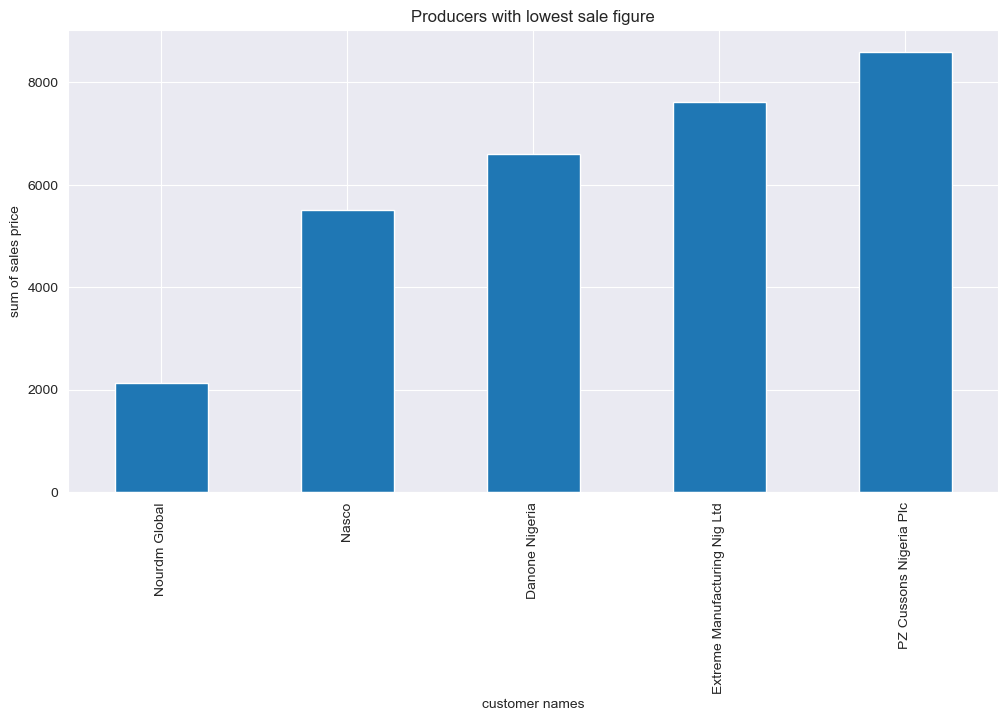

In [151]:
producer_leastsales.plot(kind='bar', figsize =(12,6),xlabel='customer names',ylabel='sum of sales price', title=
                  'Producers with lowest sale figure')

In [146]:
agents= df.groupby('Delivery Agent')['sales price usd'].sum().sort_values(ascending=True).head(10)

agents

Delivery Agent
Akinwande Akinbiyi         50.286070
Kingsley Okore  Kalu       56.467662
Adetoro \t Oluranti        95.995025
Olaleye \t Thomas         104.477612
Agenu \t Chukwudi         122.636816
Asor Henry                162.487562
Azeez Sahad               164.054726
Ekemenah Eduvie  Steve    187.363184
Clement Adeshina          263.059701
Oladoyinbo  Ibukun        317.910448
Name: sales price usd, dtype: float64

### 10 worst performing delivery agents

<AxesSubplot:title={'center':'10 worst performing delivery agents'}, xlabel='customer names', ylabel='sum of sales price'>

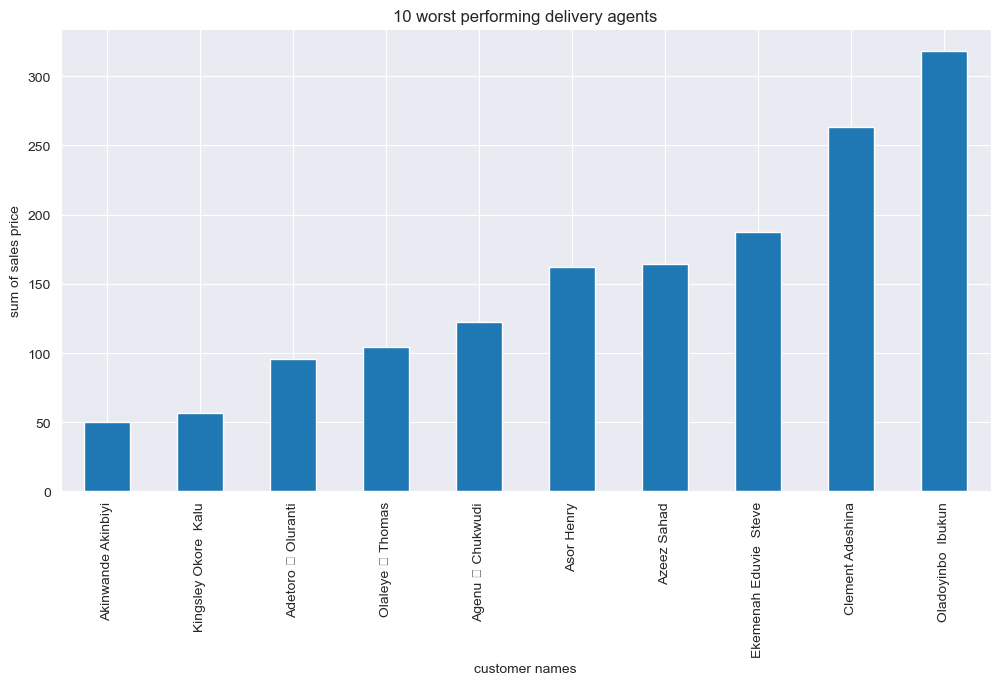

In [149]:
agents.plot(kind='bar', figsize =(12,6),xlabel='customer names',ylabel='sum of sales price', title=
                  '10 worst performing delivery agents')

### percentage of sales volume by sales channel and country

In [152]:
sales= df.groupby(['salesChannel','country'])['sales price usd'].sum().sort_values(ascending=True).head(10)

sales

salesChannel  country
Telesales     ZA           6550.084919
Mobile App    NG          13419.390547
              ZA          20525.327140
Telesales     NG          71669.241292
Field Sales   NG         272562.434821
Name: sales price usd, dtype: float64

([<matplotlib.patches.Wedge at 0x7f80ea8d03d0>,
 [Text(-1.0984269280008445, -0.058807175094778744, "('Telesales', 'ZA')"),
  Text(-1.0743082871690601, -0.23635080731802116, "('Mobile App', 'NG')"),
  Text(-0.9686241938857822, -0.5213129300325465, "('Mobile App', 'ZA')"),
  Text(-0.3504238655101364, -1.0426903253032196, "('Telesales', 'NG')"),
  Text(0.6699786951588307, 0.8724268152878331, "('Field Sales', 'NG')")],
 [Text(-0.5991419607277333, -0.032076640960788404, '1.7%'),
  Text(-0.5859863384558509, -0.12891862217346606, '3.5%'),
  Text(-0.5283404693922448, -0.2843525072904799, '5.3%'),
  Text(-0.1911402902782562, -0.5687401774381198, '18.6%'),
  Text(0.36544292463208944, 0.47586917197518164, '70.8%')])

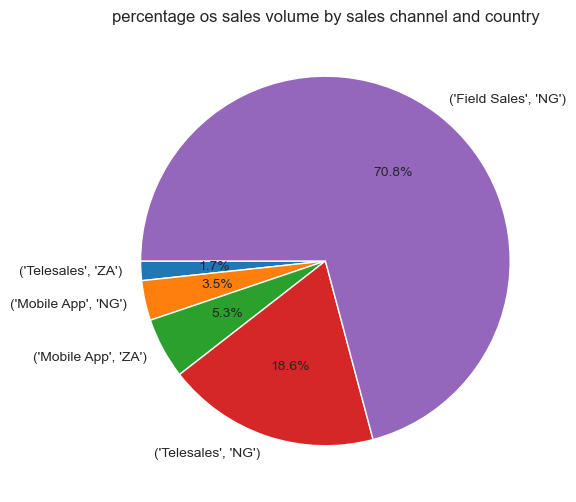

In [154]:
plt.figure(figsize=(12,6))
plt.title('percentage os sales volume by sales channel and country')
plt.pie(sales,labels=sales.index, autopct='%1.1f%%', startangle=180, shadow=False)